# **Libraries importing**

In [155]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
from plotly.graph_objs import Scatter3d
from scipy.cluster.hierarchy import dendrogram, linkage,fcluster
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import NearestNeighbors



# **Data Importing**

## Data Gathering

In [156]:
dataf=pd.read_csv('CC GENERAL.csv')
dataf.head(10)

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   
5  C10006  1809.828751           1.000000    1333.28              0.00   
6  C10007   627.260806           1.000000    7091.01           6402.63   
7  C10008  1823.652743           1.000000     436.20              0.00   
8  C10009  1014.926473           1.000000     861.49            661.49   
9  C10010   152.225975           0.545455    1281.60           1281.60   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                   95.40      0.000000             0.166667   
1                    0.00   6442.945483             0.000000   
2                    0.00      0.000000             1.000000   
3                    0.00    205.788017             0.083333   
4                    0.00      0.000000             0.083333   
5                 1333.28      0.000000             0.666667   
6                  688.38      0.000000             1.000000   
7                  436.20      0.000000             1.000000   
8                  200.00      0.000000             0.333333   
9                    0.00      0.000000             0.166667   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   
5                    0.000000                          0.583333   
6                    1.000000                          1.000000   
7                    0.000000                          1.000000   
8                    0.083333                          0.250000   
9                    0.166667                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   
5                0.000000                 0              8        1800.0   
6                0.000000                 0             64       13500.0   
7                0.000000                 0             12        2300.0   
8                0.000000                 0              5        7000.0   
9                0.000000                 0              3       11000.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12  
5  1400.057770       2407.246035          0.000000      12  
6  6354.314328        198.065894          1.000000      12  
7   679.065082        532.033990          0.000000      12  
8   688.278568        311.963409          0.000000      12  
9  1164.770591        100.302262          0.000000      12

In [157]:
dataf.shape

(8950, 18)

In [158]:
dataf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [159]:
dataf.describe().T

count         mean          std        min  \
BALANCE                           8950.0  1564.474828  2081.531879   0.000000   
BALANCE_FREQUENCY                 8950.0     0.877271     0.236904   0.000000   
PURCHASES                         8950.0  1003.204834  2136.634782   0.000000   
ONEOFF_PURCHASES                  8950.0   592.437371  1659.887917   0.000000   
INSTALLMENTS_PURCHASES            8950.0   411.067645   904.338115   0.000000   
CASH_ADVANCE                      8950.0   978.871112  2097.163877   0.000000   
PURCHASES_FREQUENCY               8950.0     0.490351     0.401371   0.000000   
ONEOFF_PURCHASES_FREQUENCY        8950.0     0.202458     0.298336   0.000000   
PURCHASES_INSTALLMENTS_FREQUENCY  8950.0     0.364437     0.397448   0.000000   
CASH_ADVANCE_FREQUENCY            8950.0     0.135144     0.200121   0.000000   
CASH_ADVANCE_TRX                  8950.0     3.248827     6.824647   0.000000   
PURCHASES_TRX                     8950.0    14.709832    24.857649   0.000000   
CREDIT_LIMIT                      8949.0  4494.449450  3638.815725  50.000000   
PAYMENTS                          8950.0  1733.143852  2895.063757   0.000000   
MINIMUM_PAYMENTS                  8637.0   864.206542  2372.446607   0.019163   
PRC_FULL_PAYMENT                  8950.0     0.153715     0.292499   0.000000   
TENURE                            8950.0    11.517318     1.338331   6.000000   

                                          25%          50%          75%  \
BALANCE                            128.281915   873.385231  2054.140036   
BALANCE_FREQUENCY                    0.888889     1.000000     1.000000   
PURCHASES                           39.635000   361.280000  1110.130000   
ONEOFF_PURCHASES                     0.000000    38.000000   577.405000   
INSTALLMENTS_PURCHASES               0.000000    89.000000   468.637500   
CASH_ADVANCE                         0.000000     0.000000  1113.821139   
PURCHASES_FREQUENCY                  0.083333     0.500000     0.916667   
ONEOFF_PURCHASES_FREQUENCY           0.000000     0.083333     0.300000   
PURCHASES_INSTALLMENTS_FREQUENCY     0.000000     0.166667     0.750000   
CASH_ADVANCE_FREQUENCY               0.000000     0.000000     0.222222   
CASH_ADVANCE_TRX                     0.000000     0.000000     4.000000   
PURCHASES_TRX                        1.000000     7.000000    17.000000   
CREDIT_LIMIT                      1600.000000  3000.000000  6500.000000   
PAYMENTS                           383.276166   856.901546  1901.134317   
MINIMUM_PAYMENTS                   169.123707   312.343947   825.485459   
PRC_FULL_PAYMENT                     0.000000     0.000000     0.142857   
TENURE                              12.000000    12.000000    12.000000   

                                          max  
BALANCE                           19043.13856  
BALANCE_FREQUENCY                     1.00000  
PURCHASES                         49039.57000  
ONEOFF_PURCHASES                  40761.25000  
INSTALLMENTS_PURCHASES            22500.00000  
CASH_ADVANCE                      47137.21176  
PURCHASES_FREQUENCY                   1.00000  
ONEOFF_PURCHASES_FREQUENCY            1.00000  
PURCHASES_INSTALLMENTS_FREQUENCY      1.00000  
CASH_ADVANCE_FREQUENCY                1.50000  
CASH_ADVANCE_TRX                    123.00000  
PURCHASES_TRX                       358.00000  
CREDIT_LIMIT                      30000.00000  
PAYMENTS                          50721.48336  
MINIMUM_PAYMENTS                  76406.20752  
PRC_FULL_PAYMENT                      1.00000  
TENURE                               12.00000

In [160]:
#irelevant column
dataf.drop('CUST_ID', axis=1,inplace=True)

# **Data cleaning**

## Detect and Drop null values

In [161]:
dataf.isna().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [162]:
dataf['MINIMUM_PAYMENTS'].unique()

array([ 139.509787, 1072.340217,  627.284787, ...,   82.418369,
         55.755628,   88.288956])

In [163]:
dataf['MINIMUM_PAYMENTS'].describe()

count     8637.000000
mean       864.206542
std       2372.446607
min          0.019163
25%        169.123707
50%        312.343947
75%        825.485459
max      76406.207520
Name: MINIMUM_PAYMENTS, dtype: float64

In [164]:
med_data = dataf[['MINIMUM_PAYMENTS','CREDIT_LIMIT']].median()
dataf.fillna(value=med_data,inplace=True)

In [165]:
dataf.isna().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

## Detect duplicated

In [166]:
dataf.duplicated().sum()

0

In [167]:
for i in dataf.columns:
    print(f"{i} = {dataf[i].nunique()}")

BALANCE = 8871
BALANCE_FREQUENCY = 43
PURCHASES = 6203
ONEOFF_PURCHASES = 4014
INSTALLMENTS_PURCHASES = 4452
CASH_ADVANCE = 4323
PURCHASES_FREQUENCY = 47
ONEOFF_PURCHASES_FREQUENCY = 47
PURCHASES_INSTALLMENTS_FREQUENCY = 47
CASH_ADVANCE_FREQUENCY = 54
CASH_ADVANCE_TRX = 65
PURCHASES_TRX = 173
CREDIT_LIMIT = 205
PAYMENTS = 8711
MINIMUM_PAYMENTS = 8636
PRC_FULL_PAYMENT = 47
TENURE = 7


In [168]:
dataf['TENURE'].value_counts()

TENURE
12    7584
11     365
10     236
6      204
8      196
7      190
9      175
Name: count, dtype: int64

# **Data Visualization**

## Detect outliers

In [169]:
numerical_cols = [col for col in dataf.columns]
num_cols = len(numerical_cols)
num_rows = (num_cols + 1) // 5

fig = make_subplots(rows=num_rows, cols=6)
col_counter = 0
for row in range(num_rows):
    for col in range(6):
        if col_counter < num_cols:
            current_col = numerical_cols[col_counter]
            trace = go.Box(
                y=dataf[current_col],
                name=current_col,
                boxmean=True
            )
            fig.add_trace(trace, row=row + 1, col=col + 1)
            fig.update_xaxes(title_text="Features", row=row + 1, col=col + 1)
            fig.update_yaxes(title_text=current_col, row=row + 1, col=col + 1)
            col_counter += 1
        else:
            fig.update_xaxes(visible=False, row=row + 1, col=col + 1)
            fig.update_yaxes(visible=False, row=row + 1, col=col + 1)
fig.update_layout(title="Boxplots of Numerical Features", width=1800, height=300*num_rows)

fig.show()


In [170]:
# outliers = ['BALANCE','PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'ONEOFF_PURCHASES_FREQUENCY','PURCHASES_INSTALLMENTS_FREQUENCY',
#         'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT']


In [171]:
# for col in outliers:
#     dataf[col] = np.log(1 + dataf[col])

### Multicollinearity

In [172]:
cm = dataf.corr()
cols = cm.columns

fig = px.imshow(
    cm, x=cols, y=cols, color_continuous_scale='viridis', title='Correlation Heatmap',
)

fig.update_layout(
    width=900,
    height=700
)
# Rotate x-axis labels for better readability
fig.update_xaxes(tickangle=-45)

fig.show()

#### High Multicollinearity between:

1.   PURCHASES and ONEOFF_PURCHASES
2.   PURCHASES_INSTALLMENTS_FREQUENCY and PURCHASES_FREQUENCY
3.   CASH_ADVANCE_FREQUENCY and CASH_ADVANCE_TRX





### Data distribution

In [173]:
numerical_cols = [col for col in dataf.columns if pd.api.types.is_numeric_dtype(dataf[col])]
colors = ['red', 'green', 'blue', 'purple', 'orange']
num_cols = len(numerical_cols)
if num_cols == 0:
    print("No numerical columns found in the DataFrame.")
else:
    num_rows = (num_cols + 3) // 5

    fig = make_subplots(rows=num_rows, cols=5)
    col_counter = 0
    for row in range(num_rows):
        for col in range(5):
            if col_counter < num_cols:
                current_col = numerical_cols[col_counter]

                # Create histogram trace with customization options
                trace = go.Histogram(
                    x=dataf[current_col],
                    name=current_col,
                    histnorm='probability',  # Normalize for better comparison
                    marker_color=colors[col_counter % len(colors)],  # Use color list with modulo for cycling
                    opacity=0.7  # Adjust transparency
                )

                fig.add_trace(trace, row=row + 1, col=col + 1)

                fig.update_xaxes(title_text="Features", row=row + 1, col=col + 1)
                fig.update_yaxes(title_text=current_col, row=row + 1, col=col + 1)
                col_counter += 1
            else:
                fig.update_xaxes(visible=False, row=row + 1, col=col + 1)
                fig.update_yaxes(visible=False, row=row + 1, col=col + 1)

    fig.update_layout(
        title="Histograms of Numerical Features",
        width=1700,
        height=300 * num_rows
    )

    fig.show()

# **Data tranformation**

## Scaling

In [174]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(dataf)
df_scaled = pd.DataFrame(df_scaled, columns=dataf.columns)
df_scaled.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0 -0.731989          -0.249434  -0.424900         -0.356934   
1  0.786961           0.134325  -0.469552         -0.356934   
2  0.447135           0.518084  -0.107668          0.108889   
3  0.049099          -1.016953   0.232058          0.546189   
4 -0.358775           0.518084  -0.462063         -0.347294   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0               -0.349079     -0.466786            -0.806490   
1               -0.454576      2.605605            -1.221758   
2               -0.454576     -0.466786             1.269843   
3               -0.454576     -0.368653            -1.014125   
4               -0.454576     -0.466786            -1.014125   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                   -0.678661                         -0.707313   
1                   -0.678661                         -0.916995   
2                    2.673451                         -0.916995   
3                   -0.399319                         -0.916995   
4                   -0.399319                         -0.916995   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0               -0.675349         -0.476070      -0.511333     -0.960378   
1                0.573963          0.110074      -0.591796      0.688678   
2               -0.675349         -0.476070      -0.109020      0.826100   
3               -0.258913         -0.329534      -0.551565      0.826100   
4               -0.675349         -0.476070      -0.551565     -0.905410   

   PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT   TENURE  
0 -0.528979         -0.302400         -0.525551  0.36068  
1  0.818642          0.097500          0.234227  0.36068  
2 -0.383805         -0.093293         -0.525551  0.36068  
3 -0.598688         -0.228307         -0.525551  0.36068  
4 -0.364368         -0.257266         -0.525551  0.36068

# **Data modeling**

## Kmeans

### Elbow curve

Inertia for 2 clusters: 128953.36240712069
Inertia for 3 clusters: 112596.49345298638
Inertia for 4 clusters: 99094.88826703937
Inertia for 5 clusters: 91794.07732759939
Inertia for 6 clusters: 87413.53719930159
Inertia for 7 clusters: 81022.43987765099
Inertia for 8 clusters: 75544.99440510805
Inertia for 9 clusters: 71717.67604126691


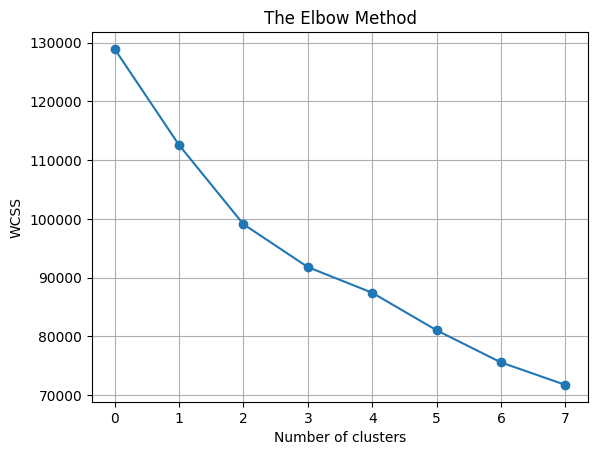

In [175]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9]
wcss = []

for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50, init='k-means++')
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

    # Print inertia value for each number of clusters
    print(f"Inertia for {num_clusters} clusters: {kmeans.inertia_}")

plt.plot(wcss, marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

### PCA

In [176]:
pca = PCA(n_components=2)  # Specify the number of principal components
df_pca = pca.fit_transform(df_scaled)

In [177]:
df_pca = pd.DataFrame(df_pca, columns=['PC1', 'PC2'])
df_pca

PC1       PC2
0    -1.683649 -1.072241
1    -1.134085  2.509150
2     0.969395 -0.383577
3    -0.888220  0.004648
4    -1.600021 -0.683795
...        ...       ...
8945 -0.362572 -2.013437
8946 -0.580810 -1.675663
8947 -0.928985 -1.808048
8948 -2.337845 -0.653611
8949 -0.558027 -0.400646

[8950 rows x 2 columns]

### Evaluation

In [220]:
kmeans = KMeans(n_clusters=4, max_iter=150, init='k-means++')
y_kmeans = kmeans.fit_predict(df_scaled)
y_kmeans_series = pd.Series(y_kmeans)

# Print the inertia value
print("Inertia:", kmeans.inertia_)
silhouette_avg = silhouette_score(df_scaled, y_kmeans)
print("Silhouette Score:", silhouette_avg)
# Print the value counts of cluster labels
print(y_kmeans_series.value_counts())

Inertia: 99062.44107967505
Silhouette Score: 0.1979789027083201
1    3990
2    3354
3    1210
0     396
Name: count, dtype: int64


In [179]:
pd.concat([dataf,pd.DataFrame(y_kmeans,columns=['Cluster1'])],axis=1)

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0       40.900749           0.818182      95.40              0.00   
1     3202.467416           0.909091       0.00              0.00   
2     2495.148862           1.000000     773.17            773.17   
3     1666.670542           0.636364    1499.00           1499.00   
4      817.714335           1.000000      16.00             16.00   
...           ...                ...        ...               ...   
8945    28.493517           1.000000     291.12              0.00   
8946    19.183215           1.000000     300.00              0.00   
8947    23.398673           0.833333     144.40              0.00   
8948    13.457564           0.833333       0.00              0.00   
8949   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
3                       0.00    205.788017             0.083333   
4                       0.00      0.000000             0.083333   
...                      ...           ...                  ...   
8945                  291.12      0.000000             1.000000   
8946                  300.00      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
3                       0.083333                          0.000000   
4                       0.083333                          0.000000   
...                          ...                               ...   
8945                    0.000000                          0.833333   
8946                    0.000000                          0.833333   
8947                    0.000000                          0.666667   
8948                    0.000000                          0.000000   
8949                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1000.0   
1                   0.250000                 4              0        7000.0   
2                   0.000000                 0             12        7500.0   
3                   0.083333                 1              1        7500.0   
4                   0.000000                 0              1        1200.0   
...                      ...               ...            ...           ...   
8945                0.000000                 0              6        1000.0   
8946                0.000000                 0              6        1000.0   
8947                0.000000                 0              5        1000.0   
8948                0.166667                 2              0         500.0   
8949                0.333333                 2             23        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  Cluster1  
0      201.802084        139.509787          0.000000      12         0  
1     4103.032597       1072.340217          0.222222      12         2  
2      622.066742        627.284787          0.000000      12         0  
3        0.000000        312.343947          0.000000      12         0  
4      678.334763        244.791237          0.000000      12         0  
...           ...               ...               ...     ...       ...  
8945   325.594462         48.886365          0.500000       6       

In [180]:
# Convert the df_pca NumPy array to a Pandas DataFrame with appropriate column names.
df_pca = pd.DataFrame(df_pca, columns=['PC1', 'PC2'])
fig = px.scatter(df_pca, x='PC1', y='PC2', color=y_kmeans, color_discrete_sequence='viridis')

# Customize the plot
fig.update_layout(
    title='K-Means Clustering (PCA)',
    xaxis_title='Principal Component 1',
    yaxis_title='Principal Component 2',
    showlegend=False  # Remove legend if y_kmeans is categorical
)

# Add gridlines
fig.update_xaxes(showgrid=True, gridcolor='lightgray') # Changed gridlinecolor to gridcolor
fig.update_yaxes(showgrid=True, gridcolor='lightgray') # Changed gridlinecolor to gridcolor

fig.show()


In [181]:
import pandas as pd
from plotly.graph_objs import Scatter3d
import plotly.graph_objects as go # import graph_objects
trace = Scatter3d(
    x=df_pca['PC1'],
    y=df_pca['PC2'],
    z=np.zeros(len(df_pca)),  # Assuming no data for 3rd dimension (z)
    mode='markers',
    marker=dict(
        size=8,  # Adjust marker size as needed
        color=y_kmeans,
        colorscale='viridis'
    ),
    text=df_pca.index.to_numpy()  # Optional: Add data point labels (index)
)

data = [trace]

# Customize the layout
layout = dict(
    title='K-Means Clustering (PCA) - 3D View',
    xaxis_title='Principal Component 1',
    yaxis_title='Principal Component 2',
    scene=dict(
        xaxis_showgrid=True,
        yaxis_showgrid=True,
        zaxis_showgrid=False  # Hide gridlines for z-axis (no data)
    )
)
fig = go.Figure(data=data, layout=layout) # Create a Figure object using go.Figure()
fig.show()

In [222]:
kmeans = KMeans(n_clusters=3, max_iter=50, init='k-means++')
y_kmeans = kmeans.fit_predict(df_scaled)
y_kmeans_series = pd.Series(y_kmeans)

# Print the inertia value
print("Inertia:", kmeans.inertia_)
silhouette_avg = silhouette_score(df_scaled, y_kmeans)
print("Silhouette Score:", silhouette_avg)
# Print the value counts of cluster labels
print(y_kmeans_series.value_counts())

Inertia: 111975.01348163605
Silhouette Score: 0.25098792290537314
2    6114
1    1561
0    1275
Name: count, dtype: int64


In [183]:
pd.concat([dataf,pd.DataFrame(y_kmeans,columns=['Cluster2'])],axis=1)

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0       40.900749           0.818182      95.40              0.00   
1     3202.467416           0.909091       0.00              0.00   
2     2495.148862           1.000000     773.17            773.17   
3     1666.670542           0.636364    1499.00           1499.00   
4      817.714335           1.000000      16.00             16.00   
...           ...                ...        ...               ...   
8945    28.493517           1.000000     291.12              0.00   
8946    19.183215           1.000000     300.00              0.00   
8947    23.398673           0.833333     144.40              0.00   
8948    13.457564           0.833333       0.00              0.00   
8949   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
3                       0.00    205.788017             0.083333   
4                       0.00      0.000000             0.083333   
...                      ...           ...                  ...   
8945                  291.12      0.000000             1.000000   
8946                  300.00      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
3                       0.083333                          0.000000   
4                       0.083333                          0.000000   
...                          ...                               ...   
8945                    0.000000                          0.833333   
8946                    0.000000                          0.833333   
8947                    0.000000                          0.666667   
8948                    0.000000                          0.000000   
8949                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1000.0   
1                   0.250000                 4              0        7000.0   
2                   0.000000                 0             12        7500.0   
3                   0.083333                 1              1        7500.0   
4                   0.000000                 0              1        1200.0   
...                      ...               ...            ...           ...   
8945                0.000000                 0              6        1000.0   
8946                0.000000                 0              6        1000.0   
8947                0.000000                 0              5        1000.0   
8948                0.166667                 2              0         500.0   
8949                0.333333                 2             23        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  Cluster2  
0      201.802084        139.509787          0.000000      12         2  
1     4103.032597       1072.340217          0.222222      12         0  
2      622.066742        627.284787          0.000000      12         2  
3        0.000000        312.343947          0.000000      12         2  
4      678.334763        244.791237          0.000000      12         2  
...           ...               ...               ...     ...       ...  
8945   325.594462         48.886365          0.500000       6       

In [184]:
# Convert the df_pca NumPy array to a Pandas DataFrame with appropriate column names.
df_pca = pd.DataFrame(df_pca, columns=['PC1', 'PC2'])
fig = px.scatter(df_pca, x='PC1', y='PC2', color=y_kmeans, color_discrete_sequence='viridis')

# Customize the plot
fig.update_layout(
    title='K-Means Clustering (PCA)',
    xaxis_title='Principal Component 1',
    yaxis_title='Principal Component 2',
    showlegend=False  # Remove legend if y_kmeans is categorical
)

# Add gridlines
fig.update_xaxes(showgrid=True, gridcolor='lightgray') # Changed gridlinecolor to gridcolor
fig.update_yaxes(showgrid=True, gridcolor='lightgray') # Changed gridlinecolor to gridcolor

fig.show()

In [185]:
import pandas as pd
from plotly.graph_objs import Scatter3d
import plotly.graph_objects as go # import graph_objects
trace = Scatter3d(
    x=df_pca['PC1'],
    y=df_pca['PC2'],
    z=np.zeros(len(df_pca)),  # Assuming no data for 3rd dimension (z)
    mode='markers',
    marker=dict(
        size=8,  # Adjust marker size as needed
        color=y_kmeans,
        colorscale='viridis'
    ),
    text=df_pca.index.to_numpy()  # Optional: Add data point labels (index)
)

data = [trace]

# Customize the layout
layout = dict(
    title='K-Means Clustering (PCA) - 3D View',
    xaxis_title='Principal Component 1',
    yaxis_title='Principal Component 2',
    scene=dict(
        xaxis_showgrid=True,
        yaxis_showgrid=True,
        zaxis_showgrid=False  # Hide gridlines for z-axis (no data)
    )
)
fig = go.Figure(data=data, layout=layout) # Create a Figure object using go.Figure()
fig.show()

### Silhouette analysis

In [186]:
# range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

# for num_clusters in range_n_clusters:

#     # intialise kmeans
#     kmeans = KMeans(n_clusters=num_clusters, max_iter=50,init='k-means++')
#     kmeans.fit(df_scaled)

#     cluster_labels = kmeans.labels_

#     # silhouette score
#     silhouette_avg = silhouette_score(df_scaled, cluster_labels)
#     print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

In [187]:
kmeans = KMeans(n_clusters=2, max_iter=50, init='k-means++')
y_kmeans = kmeans.fit_predict(df_scaled)
y_kmeans_series = pd.Series(y_kmeans)

# Print the inertia value
print("Inertia:", kmeans.inertia_)
silhouette_avg = silhouette_score(df_scaled, y_kmeans)
print("Silhouette Score:", silhouette_avg)
# Print the value counts of cluster labels
print(y_kmeans_series.value_counts())

Inertia: 128936.94462472606
Silhouette Score: 0.2638011681959324
0    6888
1    2062
Name: count, dtype: int64


In [188]:
pd.concat([dataf,pd.DataFrame(y_kmeans,columns=['Cluster3'])],axis=1)

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0       40.900749           0.818182      95.40              0.00   
1     3202.467416           0.909091       0.00              0.00   
2     2495.148862           1.000000     773.17            773.17   
3     1666.670542           0.636364    1499.00           1499.00   
4      817.714335           1.000000      16.00             16.00   
...           ...                ...        ...               ...   
8945    28.493517           1.000000     291.12              0.00   
8946    19.183215           1.000000     300.00              0.00   
8947    23.398673           0.833333     144.40              0.00   
8948    13.457564           0.833333       0.00              0.00   
8949   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
3                       0.00    205.788017             0.083333   
4                       0.00      0.000000             0.083333   
...                      ...           ...                  ...   
8945                  291.12      0.000000             1.000000   
8946                  300.00      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
3                       0.083333                          0.000000   
4                       0.083333                          0.000000   
...                          ...                               ...   
8945                    0.000000                          0.833333   
8946                    0.000000                          0.833333   
8947                    0.000000                          0.666667   
8948                    0.000000                          0.000000   
8949                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1000.0   
1                   0.250000                 4              0        7000.0   
2                   0.000000                 0             12        7500.0   
3                   0.083333                 1              1        7500.0   
4                   0.000000                 0              1        1200.0   
...                      ...               ...            ...           ...   
8945                0.000000                 0              6        1000.0   
8946                0.000000                 0              6        1000.0   
8947                0.000000                 0              5        1000.0   
8948                0.166667                 2              0         500.0   
8949                0.333333                 2             23        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  Cluster3  
0      201.802084        139.509787          0.000000      12         0  
1     4103.032597       1072.340217          0.222222      12         0  
2      622.066742        627.284787          0.000000      12         1  
3        0.000000        312.343947          0.000000      12         0  
4      678.334763        244.791237          0.000000      12         0  
...           ...               ...               ...     ...       ...  
8945   325.594462         48.886365          0.500000       6       

In [189]:
# Convert the df_pca NumPy array to a Pandas DataFrame with appropriate column names.
df_pca = pd.DataFrame(df_pca, columns=['PC1', 'PC2'])
fig = px.scatter(df_pca, x='PC1', y='PC2', color=y_kmeans, color_discrete_sequence='viridis')

# Customize the plot
fig.update_layout(
    title='K-Means Clustering (PCA)',
    xaxis_title='Principal Component 1',
    yaxis_title='Principal Component 2',
    showlegend=False  # Remove legend if y_kmeans is categorical
)

# Add gridlines
fig.update_xaxes(showgrid=True, gridcolor='lightgray') # Changed gridlinecolor to gridcolor
fig.update_yaxes(showgrid=True, gridcolor='lightgray') # Changed gridlinecolor to gridcolor

fig.show()

In [190]:
trace = Scatter3d(
    x=df_pca['PC1'],
    y=df_pca['PC2'],
    z=np.zeros(len(df_pca)),  # Assuming no data for 3rd dimension (z)
    mode='markers',
    marker=dict(
        size=8,  # Adjust marker size as needed
        color=y_kmeans,
        colorscale='viridis'
    ),
    text=df_pca.index.to_numpy()  # Optional: Add data point labels (index)
)

data = [trace]

# Customize the layout
layout = dict(
    title='K-Means Clustering (PCA) - 3D View',
    xaxis_title='Principal Component 1',
    yaxis_title='Principal Component 2',
    scene=dict(
        xaxis_showgrid=True,
        yaxis_showgrid=True,
        zaxis_showgrid=False  # Hide gridlines for z-axis (no data)
    )
)
fig = go.Figure(data=data, layout=layout) # Create a Figure object using go.Figure()
fig.show()

In [224]:
X = np.random.rand(300, 2)

# Range of n_clusters to explore
n_clusters_list = range(2, 11)

# Calculate silhouette scores and inertia for each n_clusters
silhouette_scores = []
inertia_list = []
for n_clusters in n_clusters_list:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X)
    labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(X, labels))
    inertia_list.append(kmeans.inertia_)

# Create the plot
fig = go.Figure()
# Convert n_clusters_list to a list
fig.add_trace(go.Scatter(x=list(n_clusters_list), y=silhouette_scores, mode='lines+markers',
                         name='Silhouette Score'))
fig.add_trace(go.Scatter(x=list(n_clusters_list), y=inertia_list, mode='lines+markers',
                         name='Inertia'))
fig.update_layout(title='K-means: n_clusters vs. Silhouette Score and Inertia',
                  xaxis_title='Number of Clusters',
                  yaxis_title='Metric Value')
fig.show()

## DBSCAN

In [212]:
eps_values = [2, 3, 3.4, 0.5,0.7,0.9]  # List of eps values to explore
min_samples_range = np.arange(1, 10)  # Range of min_samples to try

all_plots = []  # List to store all subplot traces

for eps in eps_values:
    silhouette_scores = {}  # Dictionary to store silhouette scores for each min_samples
    for min_samples in min_samples_range:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan_labels = dbscan.fit_predict(df_scaled)
        silhouette_scores[min_samples] = silhouette_score(df_scaled, dbscan_labels)

    # Create a trace for this eps value
    trace = go.Scatter(
        x=list(silhouette_scores.keys()),
        y=list(silhouette_scores.values()),  # Use list() for Plotly compatibility
        mode='lines+markers',
        name=f"eps = {eps}"
    )
    all_plots.append(trace)

# Create the final figure with subplots
fig = go.FigureWidget()
fig.add_traces(all_plots)
fig.update_layout(
    title="Silhouette Score vs. Min_Samples with Different Eps Values",
    xaxis_title="Min_Samples",
    yaxis_title="Silhouette Score"
)

fig.show()

In [191]:
dbscan = DBSCAN(eps=3, min_samples=5)
labels=dbscan.fit_predict(df_scaled)
print("Cluster labels:", labels)
silhouette_avg = silhouette_score(df_scaled, labels)
print("Silhouette Coefficient:", silhouette_avg)

Cluster labels: [0 0 0 ... 0 0 0]
Silhouette Coefficient: 0.6251377955572842


In [192]:
np.unique(labels)

array([-1,  0])

In [193]:
df_pca = pd.DataFrame(df_pca, columns=['PC1', 'PC2'])
fig = px.scatter(df_pca, x='PC1', y='PC2', color=labels, color_discrete_sequence='viridis')

# Customize the plot
fig.update_layout(
    title='DBSCAN Clustering (PCA)',
    xaxis_title='Principal Component 1',
    yaxis_title='Principal Component 2',
    showlegend=False  # Remove legend if y_kmeans is categorical
)

# Add gridlines
fig.update_xaxes(showgrid=True, gridcolor='lightgray') # Changed gridlinecolor to gridcolor
fig.update_yaxes(showgrid=True, gridcolor='lightgray') # Changed gridlinecolor to gridcolor

fig.show()

In [194]:
dbscan = DBSCAN(eps=3.4, min_samples=4)
labels=dbscan.fit_predict(df_scaled)
print("Cluster labels:", labels)
silhouette_avg = silhouette_score(df_scaled, labels)
print("Silhouette Coefficient:", silhouette_avg)

Cluster labels: [0 0 0 ... 0 0 0]
Silhouette Coefficient: 0.5968641860931544


In [195]:
np.unique(labels)

array([-1,  0,  1])

In [196]:
df_pca = pd.DataFrame(df_pca, columns=['PC1', 'PC2'])
fig = px.scatter(df_pca, x='PC1', y='PC2', color=labels, color_discrete_sequence='viridis')

# Customize the plot
fig.update_layout(
    title='DBSCAN Clustering (PCA)',
    xaxis_title='Principal Component 1',
    yaxis_title='Principal Component 2',
    showlegend=False  # Remove legend if y_kmeans is categorical
)

# Add gridlines
fig.update_xaxes(showgrid=True, gridcolor='lightgray') # Changed gridlinecolor to gridcolor
fig.update_yaxes(showgrid=True, gridcolor='lightgray') # Changed gridlinecolor to gridcolor

fig.show()

In [214]:
dbscan = DBSCAN(eps=0.5, min_samples=4)
labels=dbscan.fit_predict(df_scaled)
print("Cluster labels:", labels)
silhouette_avg = silhouette_score(df_scaled, labels)
print("Silhouette Coefficient:", silhouette_avg)

Cluster labels: [ 0 -1 -1 ... -1 -1 -1]
Silhouette Coefficient: -0.5150808786275584


In [211]:
df_pca = pd.DataFrame(df_pca, columns=['PC1', 'PC2'])
fig = px.scatter(df_pca, x='PC1', y='PC2', color=labels, color_discrete_sequence='viridis')

# Customize the plot
fig.update_layout(
    title='DBSCAN Clustering (PCA)',
    xaxis_title='Principal Component 1',
    yaxis_title='Principal Component 2',
    showlegend=False  # Remove legend if y_kmeans is categorical
)

# Add gridlines
fig.update_xaxes(showgrid=True, gridcolor='lightgray') # Changed gridlinecolor to gridcolor
fig.update_yaxes(showgrid=True, gridcolor='lightgray') # Changed gridlinecolor to gridcolor

fig.show()

In [215]:
dbscan = DBSCAN(eps=0.9, min_samples=4)
labels=dbscan.fit_predict(df_scaled)
print("Cluster labels:", labels)
silhouette_avg = silhouette_score(df_scaled, labels)
print("Silhouette Coefficient:", silhouette_avg)

Cluster labels: [ 0 -1  0 ... -1 -1 -1]
Silhouette Coefficient: -0.41150183136973373


In [216]:
df_pca = pd.DataFrame(df_pca, columns=['PC1', 'PC2'])
fig = px.scatter(df_pca, x='PC1', y='PC2', color=labels, color_discrete_sequence='viridis')

# Customize the plot
fig.update_layout(
    title='DBSCAN Clustering (PCA)',
    xaxis_title='Principal Component 1',
    yaxis_title='Principal Component 2',
    showlegend=False  # Remove legend if y_kmeans is categorical
)

# Add gridlines
fig.update_xaxes(showgrid=True, gridcolor='lightgray') # Changed gridlinecolor to gridcolor
fig.update_yaxes(showgrid=True, gridcolor='lightgray') # Changed gridlinecolor to gridcolor

fig.show()

## Hierarchical clustering

In [197]:
n_clusters = 3
agg_clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
clusters = agg_clustering.fit_predict(df_scaled)
linkage_matrix = linkage(df_scaled, method='ward')
silhouette_score(df_scaled, clusters)

0.1674469835551831

In [198]:
n_clusters = 3
agg_clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage='single')
clusters = agg_clustering.fit_predict(df_scaled)
linkage_matrix = linkage(df_scaled, method='single')
silhouette_score(df_scaled, clusters)

0.837994509569312

In [199]:
n_clusters = 3
agg_clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage='average')
clusters = agg_clustering.fit_predict(df_scaled)
linkage_matrix = linkage(df_scaled, method='average')
silhouette_score(df_scaled, clusters)

0.8126048615490263

In [200]:
Z = linkage(df_scaled, method='average')
num_clusters = 2
labels = fcluster(Z, num_clusters, criterion='maxclust')

# Calculate the silhouette score
silhouette_avg = silhouette_score(df_scaled, labels)

print("Silhouette Coefficient:", silhouette_avg)

Silhouette Coefficient: 0.8408164549317768


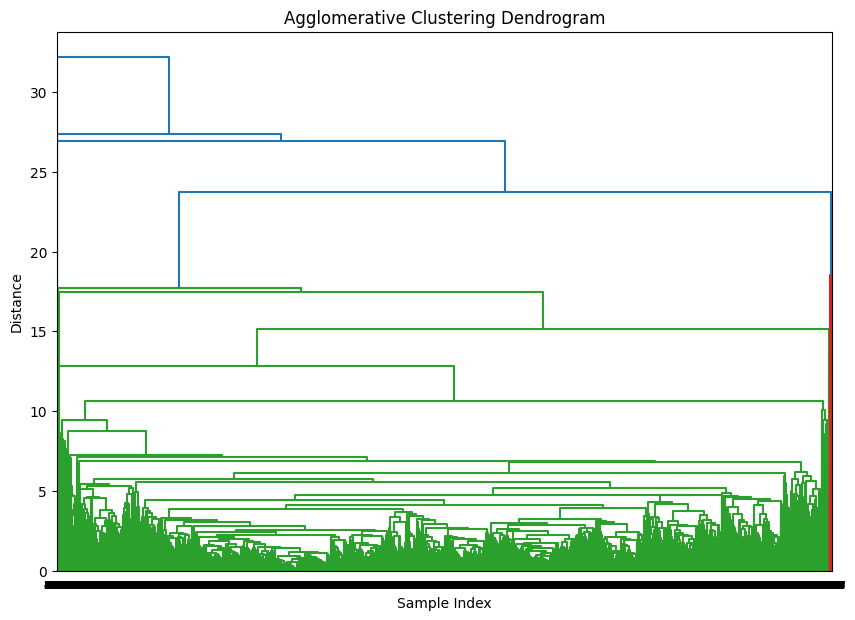

In [201]:
plt.figure(figsize=(10, 7))
dendrogram(Z, leaf_rotation=0., leaf_font_size=8.)
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.title('Agglomerative Clustering Dendrogram')
plt.show()